In [1]:
#pip install yfinance pandas matplotlib --upgrade --no-cache-dir 

In [2]:
#import yahoo finance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rolling_ewm(series, span):
    smoothed = []
    for i in range(len(series)):
        if i < span:
            smoothed.append(np.nan)
        else:
            window = series[i-span:i]
            smoothed.append(window.ewm(alpha=0.2, adjust=False).mean().iloc[-1])
    return pd.Series(smoothed, index=series.index)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


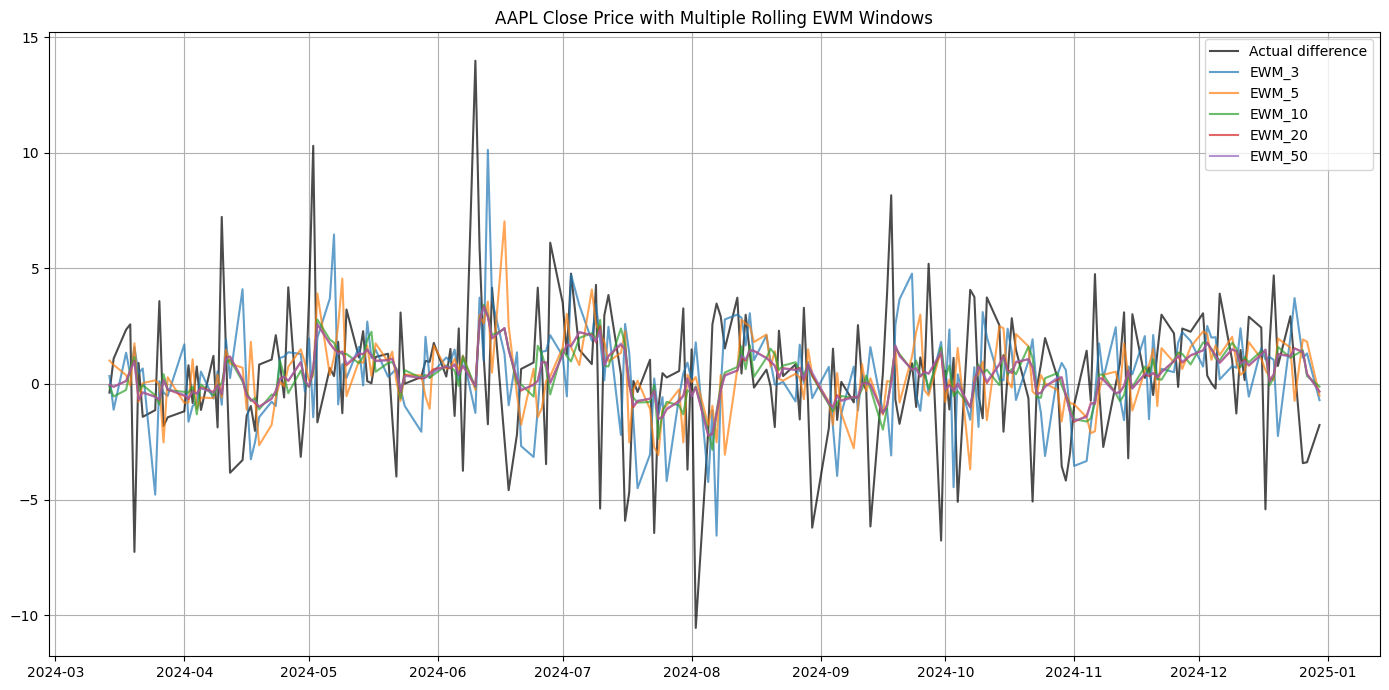

                 Close    Target     EWM_3     EWM_5    EWM_10    EWM_20  \
Date                                                                       
2024-12-23  254.989655  2.926788  2.019379  1.572385  1.128565  1.210724   
2024-12-24  257.916443  0.819061  3.714728 -0.732739  1.241521  1.544609   
2024-12-26  258.735504 -3.426208  1.130751  1.924501  1.451985  1.372781   
2024-12-27  255.309296 -3.386276  1.318953  1.823234  0.336910  0.442120   
2024-12-30  251.923019 -1.778046 -0.701249 -0.501768 -0.113844 -0.325172   

              EWM_50  
Date                  
2024-12-23  1.181905  
2024-12-24  1.530865  
2024-12-26  1.388438  
2024-12-27  0.425544  
2024-12-30 -0.336785  


In [4]:
# Download data
data = yf.download("AAPL", start="2024-01-01", end="2025-01-01")
df = pd.DataFrame()
df['Close'] = data['Close']
df['Target'] = -data['Close'].diff(-1)
# Smoothing periods
periods = [3, 5, 10, 20, 50]

# Apply for each window size
for p in periods:
    df[f'EWM_{p}'] = rolling_ewm(df['Target'], p)
df.dropna(inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Target'], label='Actual difference', color='black', alpha=0.7)
for p in periods:
    plt.plot(df[f'EWM_{p}'], label=f'EWM_{p}', alpha=0.7)
plt.title("AAPL Close Price with Multiple Rolling EWM Windows")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Look at the last few rows
print(df.tail())

In [5]:
df

,Close,Target,EWM_3,EWM_5,EWM_10,EWM_20,EWM_50
Date,,,,,,,
2024-03-14,172.186951,-0.378220,0.343580,1.010127,-0.119901,-0.043859,-0.048355
2024-03-15,171.808731,1.094849,-1.115522,0.827033,-0.542402,-0.125190,-0.114341
2024-03-18,172.903580,2.348907,1.349607,0.378346,-0.259842,0.127998,0.127520
2024-03-19,175.252487,2.577820,0.402897,-0.068977,0.687253,0.589507,0.571870
2024-03-20,177.830307,-7.265701,1.592092,1.755138,1.159412,1.001973,0.972992
...,...,...,...,...,...,...,...
2024-12-23,254.989655,2.926788,2.019379,1.572385,1.128565,1.210724,1.181905
2024-12-24,257.916443,0.819061,3.714728,-0.732739,1.241521,1.544609,1.530865
2024-12-26,258.735504,-3.426208,1.130751,1.924501,1.451985,1.372781,1.388438


In [6]:
for col in ['EWM_3','EWM_5','EWM_10','EWM_20','EWM_50']:
    rsme = np.sqrt(((df[col] - df['Target']) ** 2).mean())
    rae = (df['Target'] - df[col]).abs().mean()
    print(f'=========={col}==========')
    print(rsme)
    print(rae)
    print('==========================')

==========EWM_3==========
3.8038902615727124
2.8935525801169937
==========EWM_5==========
3.464118501118372
2.5658648320895523
==========EWM_10==========
3.251528638641089
2.4177647746923974
==========EWM_20==========
3.198936818552406
2.346961140485751
==========EWM_50==========
3.1981949008284287
2.3460223172106107
